# NN(Neural Network) 이진분류

- 피마 인디언 당뇨병 예측 데이터셋을 이용해서 당뇨병이면 1, 아니면 0으로 이진분류

In [5]:
# 피마 인디언 데이터
# 미국에 살고 있는 피마 인디언이 당뇨병 확률이 높아는 데이터

time: 376 µs (started: 2024-06-28 05:54:04 +00:00)


In [6]:
!pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.33 s (started: 2024-06-28 05:54:05 +00:00)


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf # colab에 설치가 되어 있음
import keras

time: 584 µs (started: 2024-06-28 06:08:28 +00:00)


## 1. 데이터 준비

In [8]:
# !wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/diabetes.csv

--2024-06-28 05:54:12--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2024-06-28 05:54:12 (122 MB/s) - ‘diabetes.csv’ saved [23873/23873]

time: 107 ms (started: 2024-06-28 05:54:12 +00:00)


In [9]:
pd.read_csv('diabetes.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


time: 55.1 ms (started: 2024-06-28 05:54:12 +00:00)


In [10]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.shape

(768, 9)

time: 7.32 ms (started: 2024-06-28 05:54:12 +00:00)


In [11]:
diabetes.head()
# DiabetesPedigreeFunction : 당뇨병 지수 - 가족력이 있으면 높음

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


time: 22.9 ms (started: 2024-06-28 05:54:12 +00:00)


In [12]:
df = diabetes.copy()
df.info()
# 결측치는 없음, 전부 수치형
# 인코딩할 필요 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
time: 24.8 ms (started: 2024-06-28 05:54:12 +00:00)


In [13]:
df.describe() # 0값이 있는 것이 이상함

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


time: 62.4 ms (started: 2024-06-28 05:54:12 +00:00)


### 범주형 데이터

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

time: 4 ms (started: 2024-06-28 05:54:12 +00:00)


In [15]:
# outcome값
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

time: 6.26 ms (started: 2024-06-28 05:54:12 +00:00)


<Axes: xlabel='Outcome', ylabel='count'>

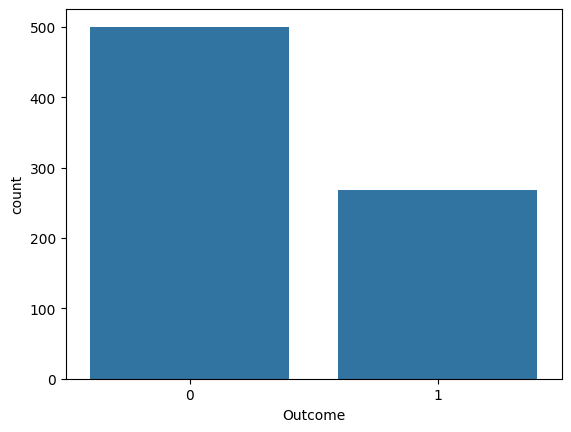

time: 274 ms (started: 2024-06-28 05:54:12 +00:00)


In [16]:
sns.countplot(x='Outcome', data=df)

### 연속형 변수

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

time: 4.74 ms (started: 2024-06-28 05:54:13 +00:00)


<Axes: xlabel='Pregnancies', ylabel='Outcome'>

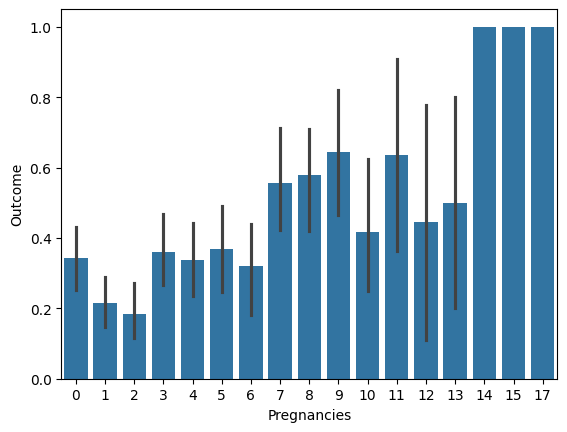

time: 1.02 s (started: 2024-06-28 05:54:13 +00:00)


In [18]:
# Pregnancies를 bar 그래프로 그리기
sns.barplot(x='Pregnancies', y='Outcome', data=df)

In [19]:
tmp = df['Pregnancies'].sort_values(ascending=False)
tmp = tmp.reset_index()
tmp

,index,Pregnancies
0,159,17
1,88,15
2,298,14
3,455,14
4,274,13
...,...,...
763,291,0
764,608,0
765,294,0
766,297,0


time: 18.1 ms (started: 2024-06-28 05:54:14 +00:00)


<Axes: xlabel='None', ylabel='Pregnancies'>

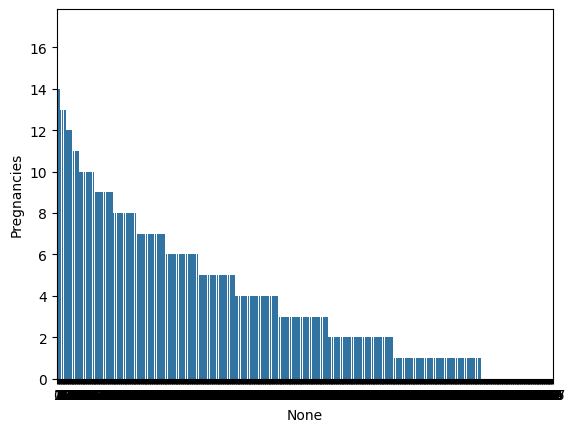

time: 15.1 s (started: 2024-06-28 05:54:14 +00:00)


In [20]:
sns.barplot(x=tmp.index, y = 'Pregnancies', data=tmp)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

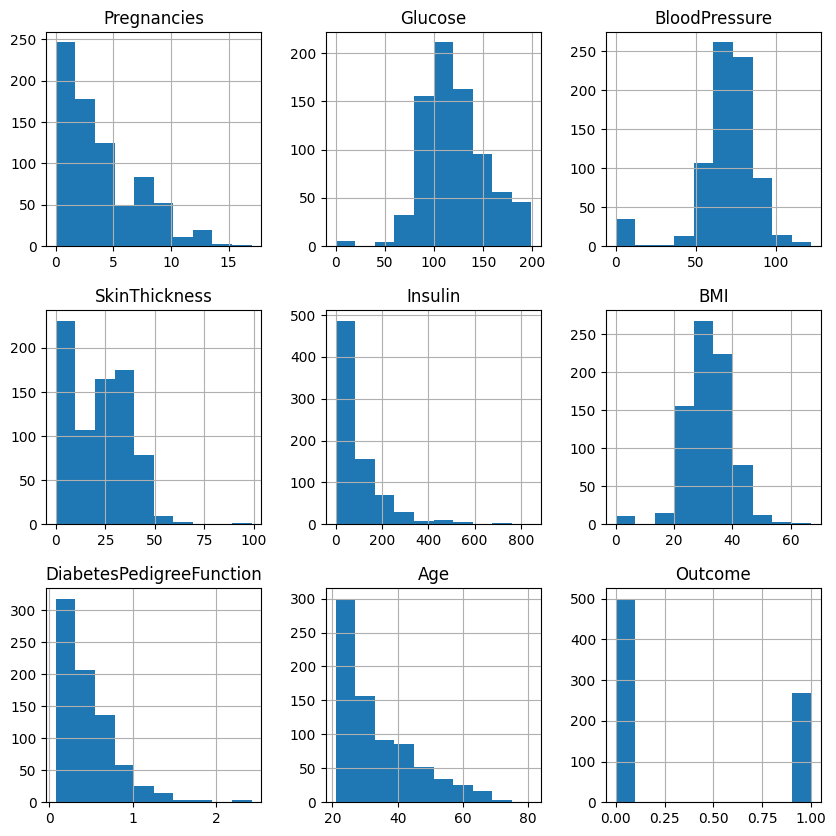

time: 4.22 s (started: 2024-06-28 05:54:29 +00:00)


In [21]:
df.hist(figsize = (10, 10))

### 결측치


In [22]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

time: 15.8 ms (started: 2024-06-28 05:54:33 +00:00)


### 중복치

In [23]:
df.duplicated().sum()

0

time: 5.13 ms (started: 2024-06-28 05:54:33 +00:00)


### 이상치

<Axes: >

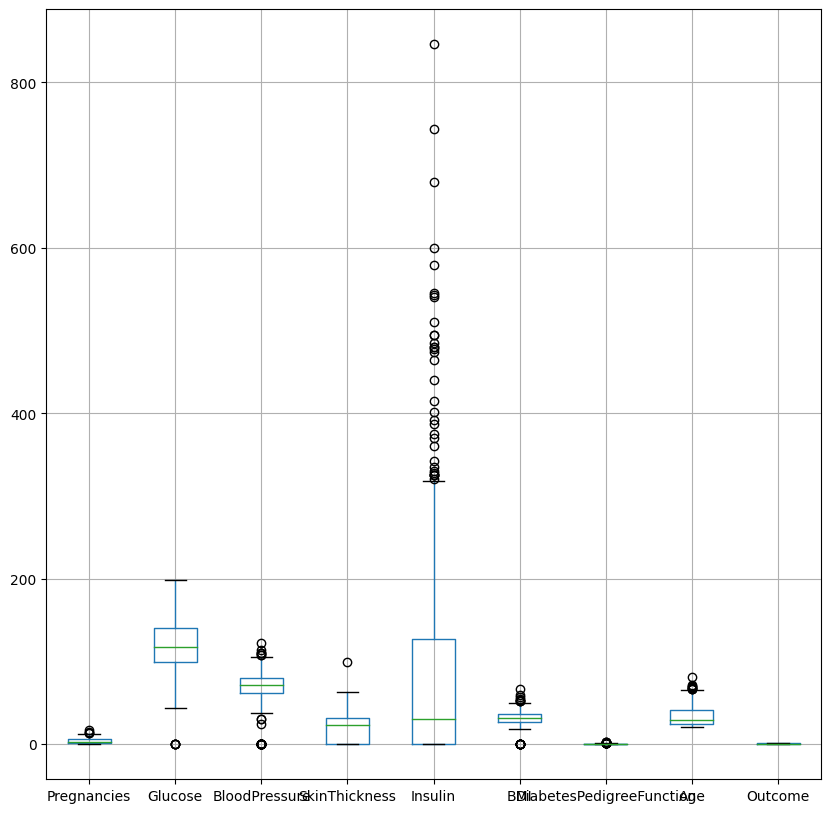

time: 580 ms (started: 2024-06-28 05:54:33 +00:00)


In [24]:
# 박스플롯 그리기
df.boxplot(figsize=(10, 10))

In [25]:
# data 0인 것을 처리하고 싶음
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


time: 94.6 ms (started: 2024-06-28 05:54:34 +00:00)


## 2. train, test 데이터 분리

In [26]:
# train, test 데이터 분리
# test_train_split 함수 사용
from sklearn.model_selection import train_test_split
# 보통 test_size는 0.2를 많이 사용함, stratify는 해당 데이터를 잘 보고 개수를 잘 나눠서 분류해달라는 옵션
train, test = train_test_split(df, test_size = 0.1, random_state=SEED, shuffle=True, stratify=df['Outcome'])

time: 256 ms (started: 2024-06-28 05:54:34 +00:00)


In [27]:
train.shape, test.shape

((691, 9), (77, 9))

time: 3.1 ms (started: 2024-06-28 05:54:34 +00:00)


In [28]:
train['Outcome'].value_counts()

Outcome
0    450
1    241
Name: count, dtype: int64

time: 14.6 ms (started: 2024-06-28 05:54:34 +00:00)


In [29]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
255,1,113,64,35,0,33.6,0.543,21,1
125,1,88,30,42,99,55.0,0.496,26,1
46,1,146,56,0,0,29.7,0.564,29,0
312,2,155,74,17,96,26.6,0.433,27,1
519,6,129,90,7,326,19.6,0.582,60,0


time: 74.2 ms (started: 2024-06-28 05:54:34 +00:00)


In [30]:
# 이상치 데이터 확인, 단위 스케일링

time: 1.46 ms (started: 2024-06-28 05:54:34 +00:00)


### X, y 변수 분리

In [31]:
X_train = train.drop('Outcome', axis = 1)
y_train = train['Outcome']

X_train.shape, y_train.shape

((691, 8), (691,))

time: 11.3 ms (started: 2024-06-28 05:54:34 +00:00)


In [32]:
# 이상치 0인 값을 특정값(median 값, 중간값)으로 치환
# 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI'
# Glucose가 0인 데이터 셋 출력, 이를 median 값으로 치환
# df.loc[df['Glucose'] == 0, 'Glucose'] = med_glucose

time: 342 µs (started: 2024-06-28 05:54:34 +00:00)


In [33]:
median_list = []
col_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
for col in col_list:
    med = df[col].median()
    X_train.loc[df[col] == 0, col] = med
    median_list.append(med)

time: 23 ms (started: 2024-06-28 05:54:34 +00:00)


In [34]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,691.0,3.875543,3.385240,0.000,1.0000,3.000,6.000,17.000
Glucose,691.0,121.616498,30.280557,44.000,99.0000,117.000,139.500,199.000
BloodPressure,691.0,72.178003,12.217065,24.000,64.0000,72.000,80.000,122.000
SkinThickness,691.0,27.246020,9.168644,7.000,23.0000,23.000,32.000,99.000
Insulin,691.0,94.025326,102.556911,15.000,30.5000,40.000,127.500,846.000
BMI,691.0,32.360347,6.735955,18.200,27.6000,32.000,36.450,67.100
DiabetesPedigreeFunction,691.0,0.473376,0.330139,0.078,0.2445,0.378,0.628,2.329
Age,691.0,33.410999,11.759256,21.000,24.0000,29.000,41.000,81.000


time: 142 ms (started: 2024-06-28 05:54:34 +00:00)


In [35]:
# 스케일링해서 집어넣으면 됨
# StandardScaler - 집어넣으면 스스로 계산을 해줌
# 평균, 표준편차 구하고, transform으로 X_train에 저장, 자동으로 numpy array로 변경됨
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_train_s

array([[-0.8500507 , -0.28476158, -0.66987668, ...,  0.18416848,
         0.2110448 , -1.05618828],
       [-0.8500507 , -1.11097193, -3.45488511, ...,  3.36345057,
         0.0685775 , -0.63068332],
       [-0.8500507 ,  0.80583607, -1.32517278, ..., -0.39523339,
         0.27470041, -0.37538035],
       ...,
       [-0.8500507 , -0.8135362 , -0.1784046 , ...,  0.85270911,
        -0.77410146, -0.29027936],
       [-1.1456647 , -0.58219731, -0.66987668, ...,  0.18416848,
         0.11101457, -0.97108729],
       [ 0.03679132,  0.73973924, -1.16134875, ..., -0.42494631,
        -0.56494733,  0.30542758]])

time: 10.7 ms (started: 2024-06-28 05:54:35 +00:00)


In [36]:
ss.mean_ # 각 컬럼당 평균 값 - 이를 가지고 있어야 함(test에도 사용)
ss.var_ # 분산

array([1.14432658e+01, 9.15585198e+02, 1.49040674e+02, 8.39423684e+01,
       1.05026987e+04, 4.53074291e+01, 1.08834177e-01, 1.38079995e+02])

time: 7.93 ms (started: 2024-06-28 05:54:35 +00:00)


In [37]:
y_train_e = y_train.to_numpy()
y_train_e

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

time: 13.2 ms (started: 2024-06-28 05:54:35 +00:00)


In [38]:
print(X_train_s.shape, y_train_e.shape) # 개수가 맞아야 함
print(type(X_train_s), type(y_train_e))

(691, 8) (691,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 3.6 ms (started: 2024-06-28 05:54:35 +00:00)


## 모델 학습

In [58]:
X_train_s.shape

(691, 8)

time: 3.42 ms (started: 2024-06-28 06:05:49 +00:00)


In [67]:
## Neural Network 사용
from keras import layers

model = keras.Sequential([
    # input_shape은 한번에 몇개 씩 들어올지 결정 - shape봤을 때, feature만큼(젤 처음만)
    layers.Dense(units=8, activation='relu', input_shape=(8, )),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=3, activation='relu'),
    layers.Dense(units=1, activation='sigmoid') # 이진 분류이므로 출력은 하나면 됨 - activation을 sigmoid 사용
])

time: 60.1 ms (started: 2024-06-28 06:08:49 +00:00)


In [68]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 72        
                                                                 
 dense_16 (Dense)            (None, 5)                 45        
                                                                 
 dense_17 (Dense)            (None, 3)                 18        
                                                                 
 dense_18 (Dense)            (None, 1)                 4         
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 38.4 ms (started: 2024-06-28 06:08:50 +00:00)


In [72]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

time: 15.4 ms (started: 2024-06-28 06:10:40 +00:00)


In [73]:
EPOCHS = 100
BATCH_SIZE = 16

history = model.fit(
          X_train_s, y_train_e,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_split=0.2
          )

Epoch 1/100
35/35 [==============================] - 4s 19ms/step - loss: 0.7170 - accuracy: 0.6322 - val_loss: 0.6989 - val_accuracy: 0.6763
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6982 - accuracy: 0.6449 - val_loss: 0.6874 - val_accuracy: 0.6763
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 0.6890 - accuracy: 0.6449 - val_loss: 0.6819 - val_accuracy: 0.6763
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6831 - accuracy: 0.6449 - val_loss: 0.6781 - val_accuracy: 0.6763
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 0.6792 - accuracy: 0.6449 - val_loss: 0.6744 - val_accuracy: 0.6763
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6759 - accuracy: 0.6449 - val_loss: 0.6715 - val_accuracy: 0.6763
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 0.6731 - accuracy: 0.6449 - val_loss: 0.6688 - val_accuracy: 0.6763
Epoch 8/100


### 학습 곡선

In [76]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 1.32 ms (started: 2024-06-28 06:11:15 +00:00)


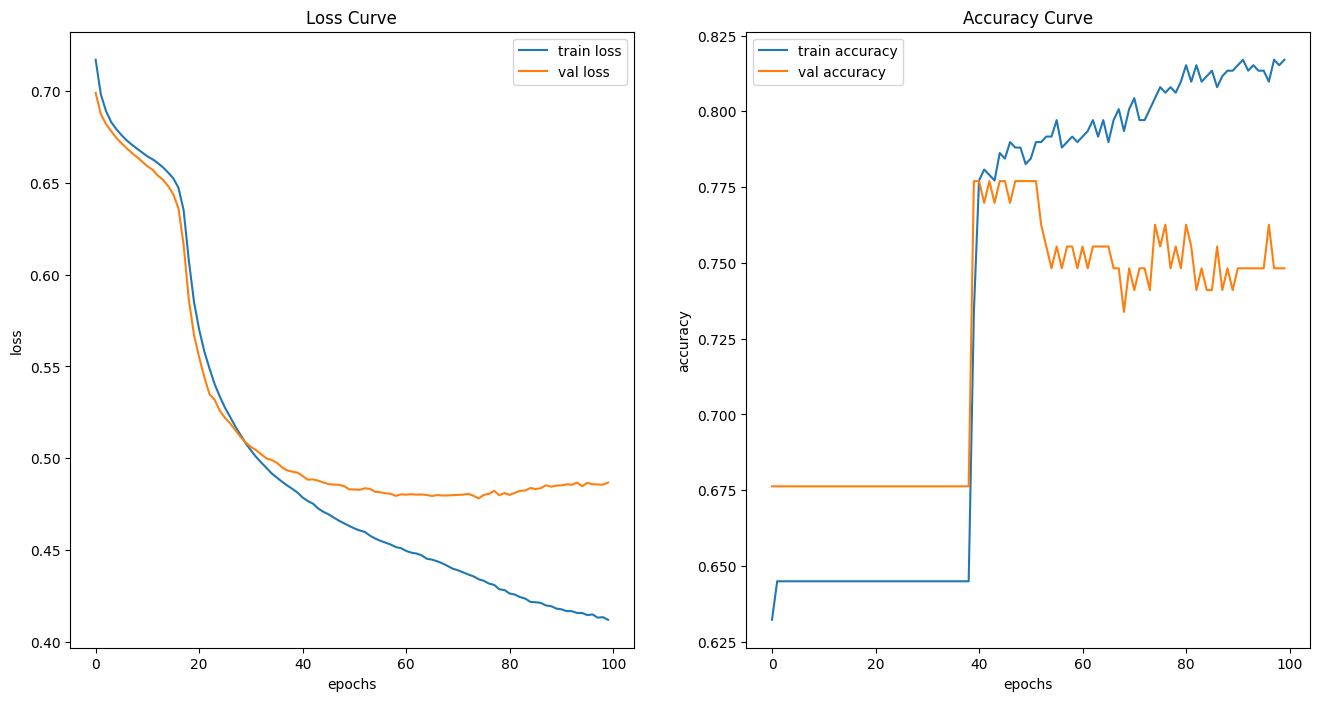

time: 958 ms (started: 2024-06-28 06:16:23 +00:00)


In [79]:
plot_history(history)

## 예측

In [80]:
X_test = test.drop('Outcome', axis=1)
y_test = test['Outcome']
X_test.shape, y_test.shape

((77, 8), (77,))

time: 5.97 ms (started: 2024-06-28 06:16:43 +00:00)


In [90]:
for i, col in enumerate(col_list):
    med = median_list[i]
    X_test.loc[X_test[col] == 0, col] = med
    median_list.append(med)

time: 7.25 ms (started: 2024-06-28 06:18:01 +00:00)


In [93]:
X_test_s = ss.transform(X_test)
#y_test = y_test.to_numpy()
X_test_s.shape, y_test.shape

((77, 8), (77,))

time: 8.96 ms (started: 2024-06-28 06:18:20 +00:00)


In [99]:
print(type(X_test_s), type(y_test_e))
print(X_test_s.shape, y_test_e.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(77, 8) (77,)
time: 4.53 ms (started: 2024-06-28 06:19:03 +00:00)


In [100]:
# 예측값
y_pred = model.predict(X_test_s)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)
y_pred

3/3 [==============================] - 0s 3ms/step


array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

time: 118 ms (started: 2024-06-28 06:19:07 +00:00)


In [101]:
y_test_e

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

time: 3.98 ms (started: 2024-06-28 06:19:36 +00:00)


In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
def print_metrics(y_true, y_pred, aver='binary'):
    print("accuracy:", accuracy_score(y_true, y_pred))
    print("recall_score:", recall_score(y_true, y_pred, average = aver))
    print("precision_score:", precision_score(y_true, y_pred, average = aver))
    print("f1_score:", f1_score(y_true, y_pred, average = aver))
    # 그림 그리기
    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt = 'd', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

time: 1.18 ms (started: 2024-06-28 06:19:39 +00:00)


accuracy: 0.7272727272727273
recall_score: 0.6296296296296297
precision_score: 0.6071428571428571
f1_score: 0.6181818181818182


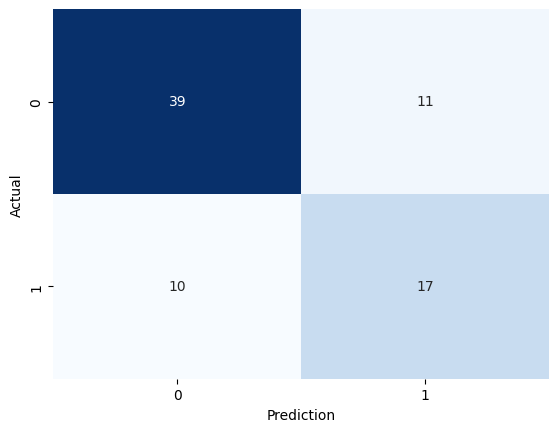

time: 145 ms (started: 2024-06-28 06:19:40 +00:00)


In [103]:
print_metrics(y_test_e, y_pred)